# Parameter Efficiency

In [14]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt

from qiskit import Aer
from tqdm.notebook import tqdm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import sys
sys.path.insert(0, '../src/')
from neuralnetwork import *
from analysis import *

%matplotlib notebook
#%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Generating data

In [56]:
np.random.seed(42)
layer1 = Dense(n_features=3, n_targets=100, scale = 1, activation = Tanh())
layer2 = Dense(n_features=100, n_targets=100, scale = 1, activation = Tanh())
layer3 = Dense(n_features=100, n_targets=1, scale = 1, activation = Identity())

layers = [layer1, layer2, layer3]
optimizer = Adam()

network = NeuralNetwork(layers, optimizer)

In [57]:
np.random.seed(42)
x = np.random.uniform(0, np.pi, (100,3))
y = network.predict(x)
y = y - np.min(y)
y = y/np.max(y)

In [60]:
np.random.seed(42)
optimizer = Adam(lr=1e-1)

layer1 = Dense(n_features=3, n_targets=5, scale = 1, activation = Sigmoid())
layer2 = Dense(n_features=5, n_targets=5, scale = 1, activation = Sigmoid())
layer3 = Dense(n_features=5, n_targets=1, scale = 1, activation = Identity())
layers =[layer1, layer2, layer3]
network = NeuralNetwork(layers, optimizer)

In [61]:
network.train(x,y, epochs = 50000, verbose=True)

  0%|          | 0/50000 [00:00<?, ?it/s]

epoch: 0, loss: 0.18560509601003183
epoch: 5000, loss: 0.0033289349307202365
epoch: 10000, loss: 0.000818201750269589
epoch: 15000, loss: 0.0007369665244570667
epoch: 20000, loss: 0.0007552225864548631
epoch: 25000, loss: 0.000679322788735438
epoch: 30000, loss: 0.0006765615950098619
epoch: 35000, loss: 0.0006685665061912134
epoch: 40000, loss: 0.0006694032859103861
epoch: 45000, loss: 0.000675065404967389


<IPython.core.display.Javascript object>


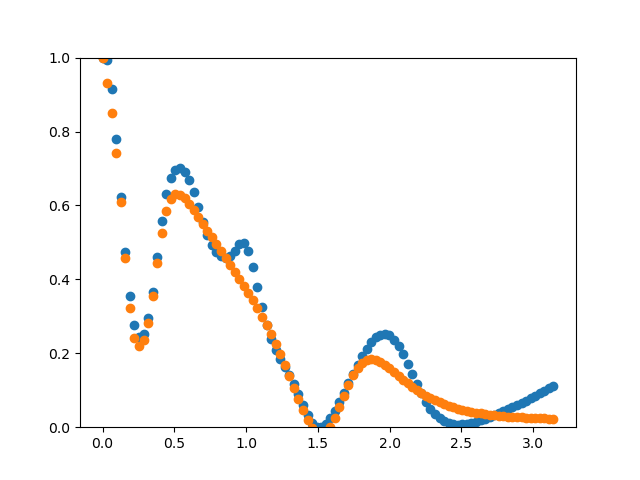

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in tqdm(range(1000)):
    network.backward(x, y)
    network.step()
    y_pred = network.predict(x)
    
    loss = np.mean((y_pred - y)**2)
    
    
    ax.clear()
    ax.plot(x, y, "o")
    ax.plot(x, y_pred, "o")
    ax.set_ylim([0, 1])
    fig.canvas.draw()